<a href="https://colab.research.google.com/github/21f1002963/MLT_WORKSHOP/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
rng = np.random.default_rng(seed = 138)

## Toy Dataset

As before, let us generate a toy dataset.

In [ ]:
rng = np.random.default_rng(seed = 123)
mus = np.array([
    [-3, 3],
    [3, 3],
    [3, -3]
])
cov = np.eye(2)
n = 60
X = np.concatenate([rng.multivariate_normal(mus[j], cov, n // 3)
                    for j in range(3)], axis = 0).T
X.shape

(2, 60)

### Visualize the dataset

As before, let us visualize the dataset using a scatter plot.

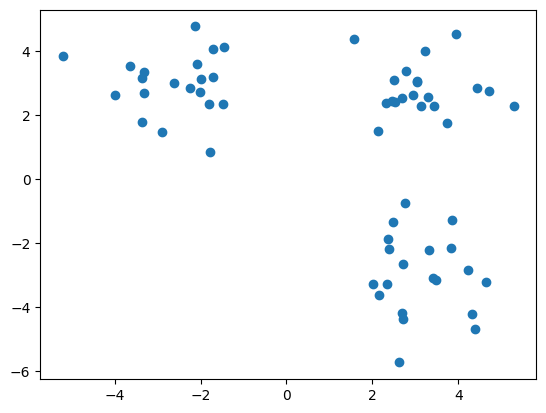

In [ ]:
plt.scatter(X[0, :], X[1, :])

### K-Means



In [ ]:
def k_means(X, k = 3):
    d, n = X.shape
    # Initialization
    ind = rng.choice(np.arange(n), k, replace = False)
    mus = X[:, ind]
    z = np.ones(n)
    z_prev = np.zeros(n)
    while not np.array_equal(z, z_prev):
        z_prev = z.copy()
        # Step-1: Cluster assignment
        for i in range(n):
            dist = np.linalg.norm(mus - X[:, i].reshape(d, 1),
                                axis = 0)
            # norm of each column gives me Euclidean distance
            z[i] = np.argmin(dist)
        # Step-2: Cluster centers
        for j in range(k):
            if np.any(z == j): # corner case
                mus[:, j] = X[:, z == j].mean(axis = 1)
    return z

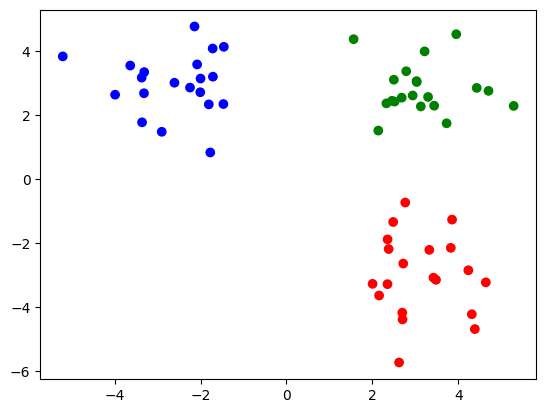

In [ ]:
rng = np.random.default_rng(seed = 13049)
z = k_means(X)
colors = np.array(['red', 'blue', 'green'])
plt.scatter(X[0, :], X[1, :],
            c = colors[z.astype(int)])

# Image Segmentation

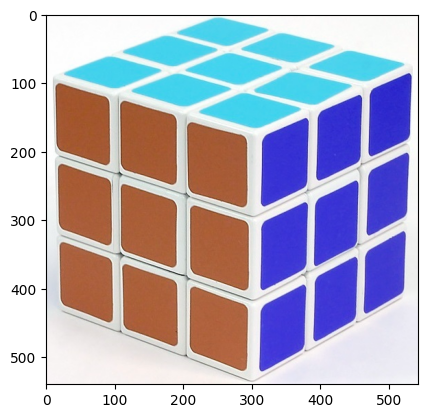

In [ ]:
import cv2 # Open-CV (computer vision)
img = cv2.imread('cube.jpg')
plt.imshow(img)

This is rather big. Let us have a more manageable size.

array([[[252, 252, 252],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [249, 250, 248],
        [251, 249, 248],
        [251, 249, 248]],

       [[252, 252, 252],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [249, 250, 248],
        [250, 250, 248],
        [250, 248, 248]],

       [[252, 252, 252],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [249, 250, 248],
        [250, 251, 249],
        [251, 249, 248]],

       ...,

       [[250, 245, 246],
        [249, 244, 245],
        [249, 244, 245],
        ...,
        [238, 238, 244],
        [239, 240, 244],
        [240, 240, 246]],

       [[250, 245, 246],
        [250, 245, 246],
        [251, 246, 247],
        ...,
        [240, 241, 245],
        [244, 243, 247],
        [243, 244, 248]],

       [[250, 245, 246],
        [251, 246, 247],
        [249, 244, 245],
        ...,
        [244, 245, 249],
        [245, 244, 249],
        [244, 245, 249]]], dtype=uint8)
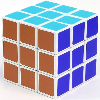

In [ ]:
img = cv2.resize(img, (100, 100))
img

This is a RGB image having $100 \times 100 = 10,000$ pixels with three channels. We can view this as a dataset of $10,000$ points in $\mathbb{R}^{3}$ and run k-means on it.

In [ ]:
X = img.reshape(100 * 100, 3).T
print(X.shape)
X = X.astype(float)

(3, 10000)


In [ ]:
rng = np.random.default_rng(seed = 13049)
z = k_means(X, k = 4)

Each pixel can be identified with one of four colors.

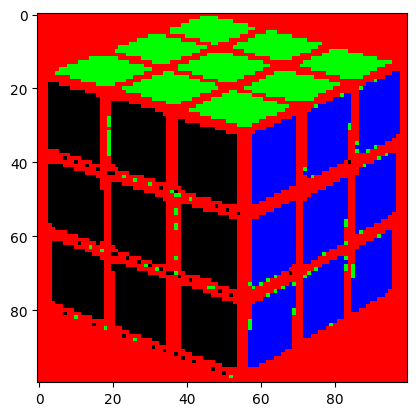

In [ ]:
color_mapping = {
    0: [255, 0, 0],
    1: [0, 255, 0],
    2: [0, 0, 255],
    3: [0, 0, 0]
}
for i in range(X.shape[1]):
    X[:, i] = color_mapping[z[i]]

img_updated = X.T.reshape(100, 100, 3)
plt.imshow(img_updated.astype(int))